Objetivo: Usando el dataset winequality-red.csv, el cual consiste en datos de vinos rojos basados en datos físico-químicos y una métrica de calidad de vino. Predecir la calidad del vino usando los atributos físico-químicos del mismo.

In [1]:
# Importa las librerias necesarias
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import plot_boundary, plot_svm_margins

In [2]:
# Carga la ruta al archivo de datos
ruta = os.path.dirname((os.path.abspath('data_features')))
ruta_datos = os.path.join(ruta, "dataset/winequality-red.csv")

# Lectura del archivo a DataFrame
wines = pd.read_csv(ruta_datos)

In [3]:
# Visualiza los primeros registros
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Buscamos informacion del dataset
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observaciones: Existen 1599 registros y 11 campos sin valores faltantes.
Además, se observa que todos los campos son numéricos (10 reales y 1 entero).

Las características y objetivo del problema son (Cortez, 2009):

| Característica       | Objetivo |Medición                   |
|----------------------|----------|---------------------------|
| fixed acidity        |          | concentracion en  g/cm³   |
| volatile acidity     |          | concentracion en  g/cm³   |
| citric acid          |          | concentracion en  g/cm³   |
| residual sugar       |          | concentracion en  g/cm³   |
| chlorides            |          | concentracion en  g/cm³   |
| free sulfur dioxide  |          | concentracion en  g/cm³   |
| total sulfur dioxide |          | concentracion en  g/cm³   |
| density              |          | concentracion en  g/cm³   |
| ph                   |          | adimensional entre 0 y 14 |
| sulphates            |          | concentracion en  g/cm³   |
| alcohol              |          | concentracion en % vol    |
|                      | quality  | puntaje entre 0 y 10      |





In [5]:
# Descripcion de los datos
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Busca el rango de cada matriz
rango = wines.describe().loc[['min', 'max']]

In [7]:
# Agrega el indice 'range' y  se completa la fila creada con la diferencia entre 'max' y 'min'.
rango.loc['range'] = rango.loc['max'] - rango.loc['min']

In [57]:
# Presenta el rango de cada campo
rango.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8.0
range,11.3,1.46,1.0,14.6,0.599,71.0,283.0,0.01362,1.27,1.67,6.5,5.0


In [8]:
# Busqueda de registros repetidos
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")


In [9]:
duplicados(wines)

El DataFrame tiene registros duplicados.


In [10]:
# Eliminar registros duplicados
wines = wines.drop_duplicates()

In [11]:
# Buscamos informacion del dataset para corroborar los registros eliminados
wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


Observaciones: Luego de la eliminación de registros duplicados, se tiene 1359 registros y 11 campos sin valores faltantes.

In [12]:
# Busca una descripcion de los datos luego de eliminar duplicados
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
#Se busca el rango de cada matriz luego de eliminar duplicados
rango = wines.describe().loc[['min', 'max']]

# Se agrega el indice 'range' y  se completa la fila creada con la diferencia entre 'max' y 'min'.
rango.loc['range'] = rango.loc['max'] - rango.loc['min']

# se presenta el rango de cada campo
rango.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8.0
range,11.3,1.46,1.0,14.6,0.599,71.0,283.0,0.01362,1.27,1.67,6.5,5.0


In [14]:
# Graficado de caracteristicas
def distribuciones_reales(df):
  """
  Genera la distribución de las características
  numéricas almacenadas en el DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """
  # Obtén la lista de nombres de columnas numéricas
  features_numericas = df.select_dtypes(include=['float64']).columns

  # Itera sobre las columnas numéricas y grafica la distribución de cada una
  for feature in features_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=20, edgecolor='black', kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia absoluta')
    plt.grid(True)
    plt.show()


c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


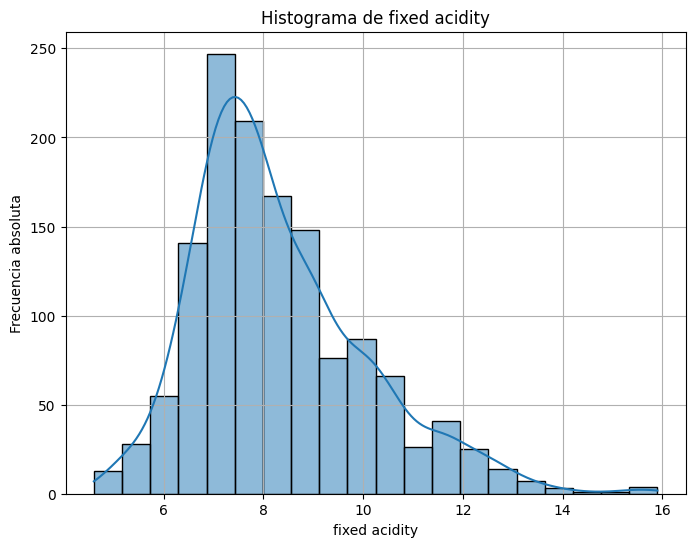

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


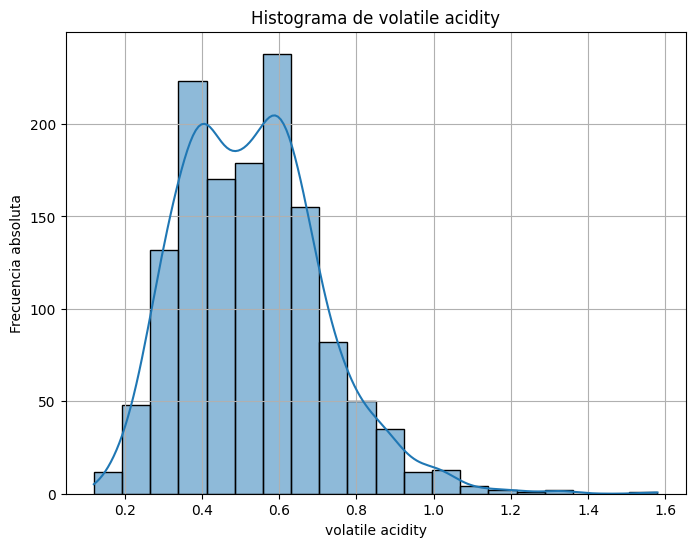

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


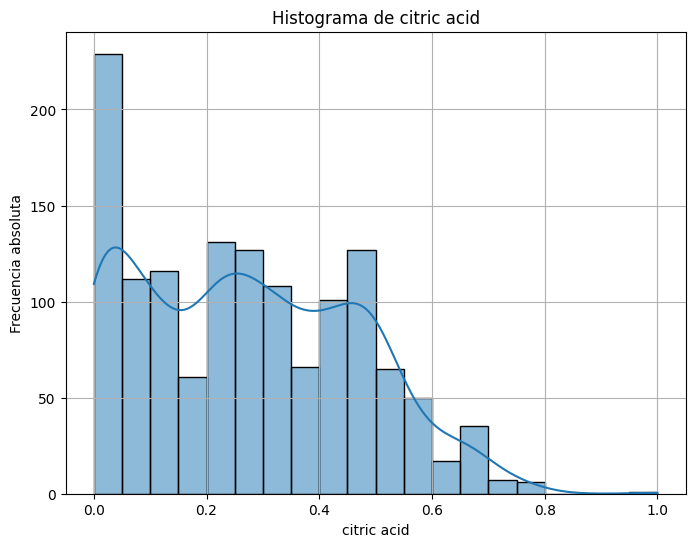

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


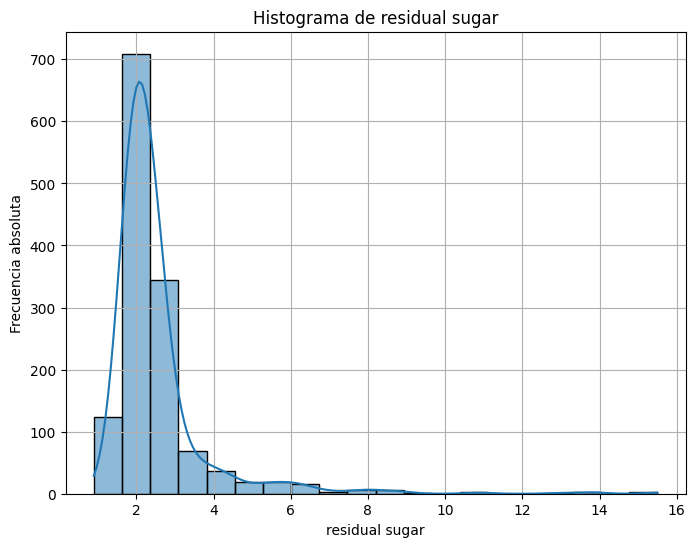

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


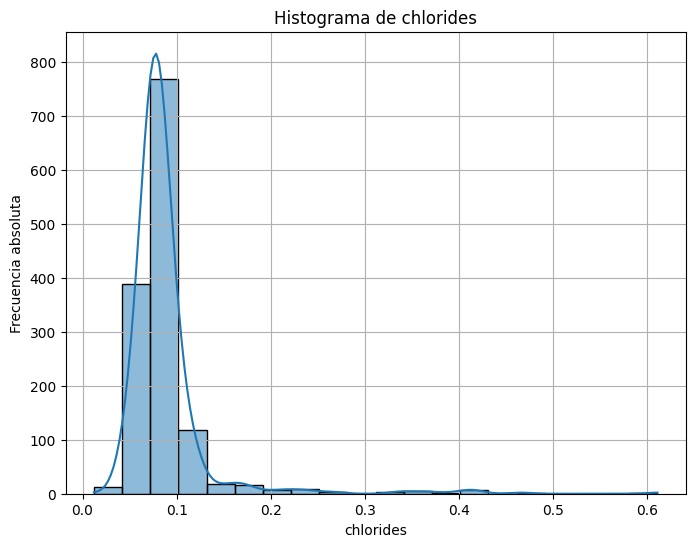

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


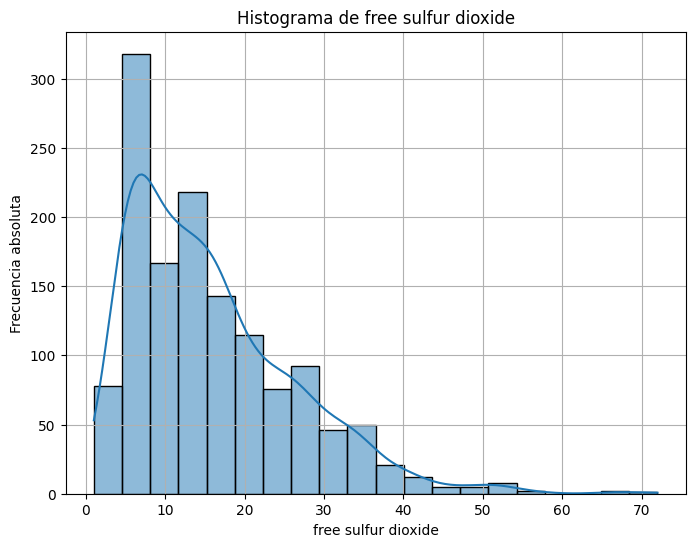

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


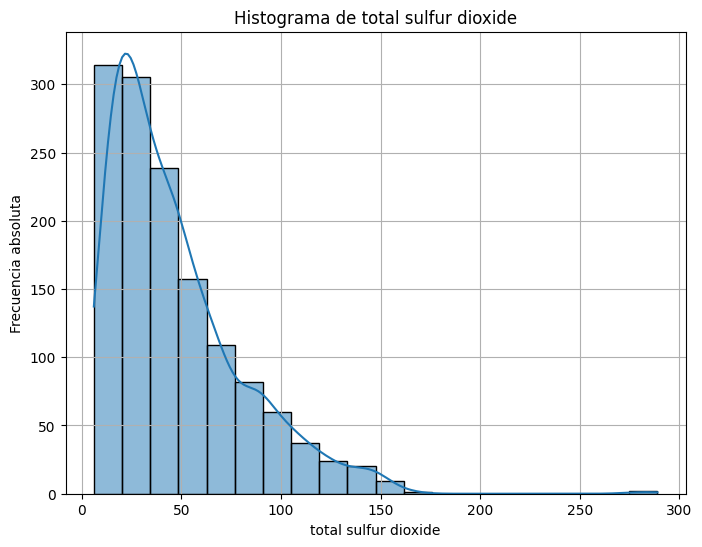

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


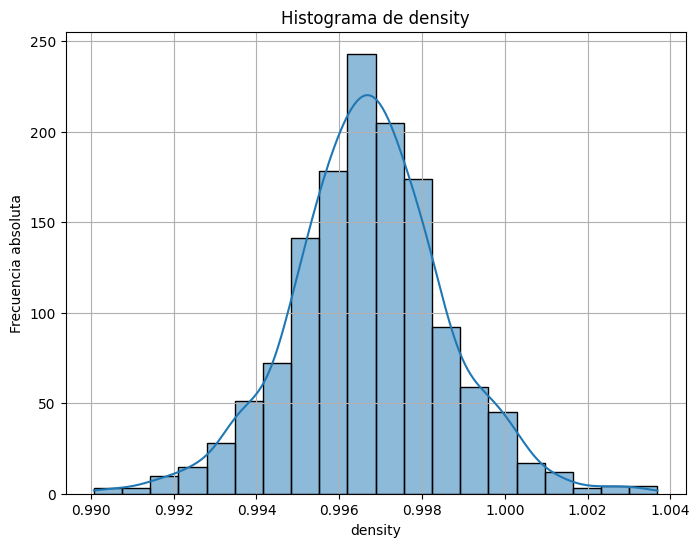

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


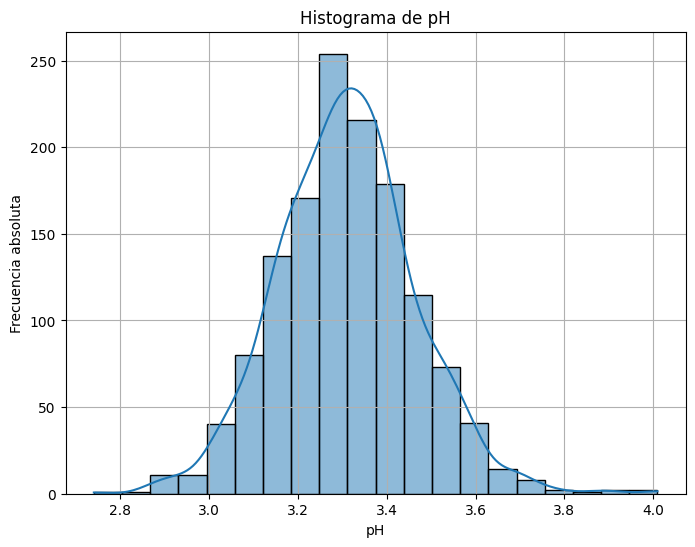

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


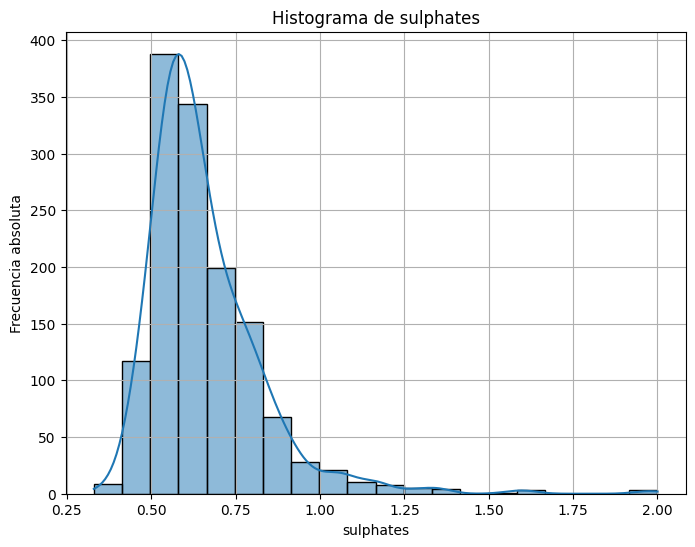

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


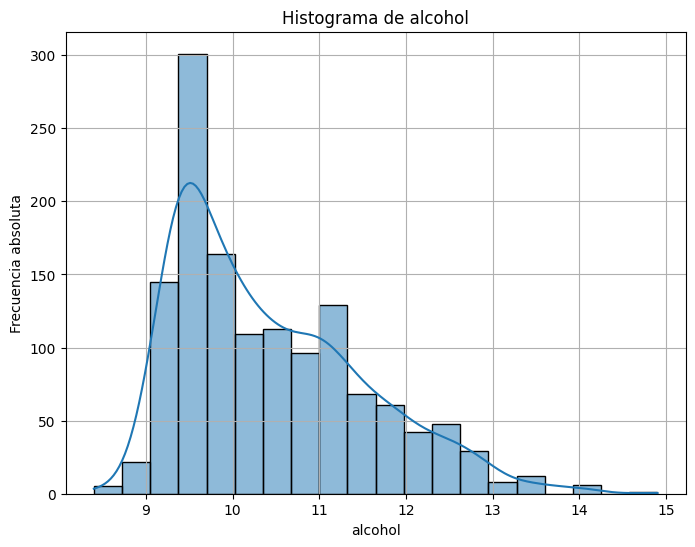

In [15]:
distribuciones_reales(wines)

In [67]:
# Se evalua el balance de clases
# Graficado de característica categorica

def dist_enteros(df):
  """
  Genera la distribución de las características
  (u objetivo) numéricas almacenadas en el
  DataFrame de entrada.

  :param:
  :df: DataFrame con los atributos.
  """ 
  # Obtén la lista de nombres de columnas numéricas
  target_numerico = df.select_dtypes(include=['int64']).columns
  # Contar las ocurrencias de cada valor en la columna entera
  target_counts = df[target_numerico].value_counts().sort_index()

  # Crear un DataFrame para facilitar el graficado
  target_counts_df = target_counts.reset_index()
  target_counts_df.columns = ['quality', 'count']

  # Graficar el gráfico de barras con Seaborn
  sns.barplot(x='quality', y='count', data=target_counts_df)
  plt.xlabel('Quality')
  plt.ylabel('Count')
  plt.title('Count of Each Quality Value')
  plt.show()


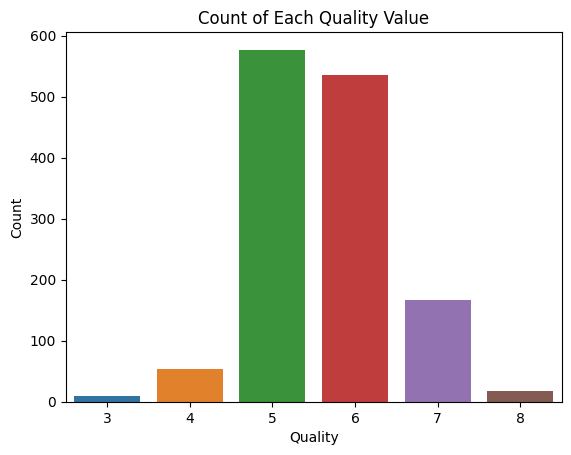

In [68]:
dist_enteros(wines)

In [16]:
# Correlacion entre las features
def mapa_corr(df):
  """
  Grafica el campo dicretizado de
  índices de correlación entre las
  características del Data Set.

  :param:
  :df: DataFrame con los atributos.
  """
  correlacion = df.iloc[:, 0:].corr().round(1)
  
  plt.figure(figsize=(10, 8))
  sns.heatmap(data=correlacion, annot=False, cmap='RdBu_r', linewidths=0.1, vmin=-1, vmax=1)
  plt.show()


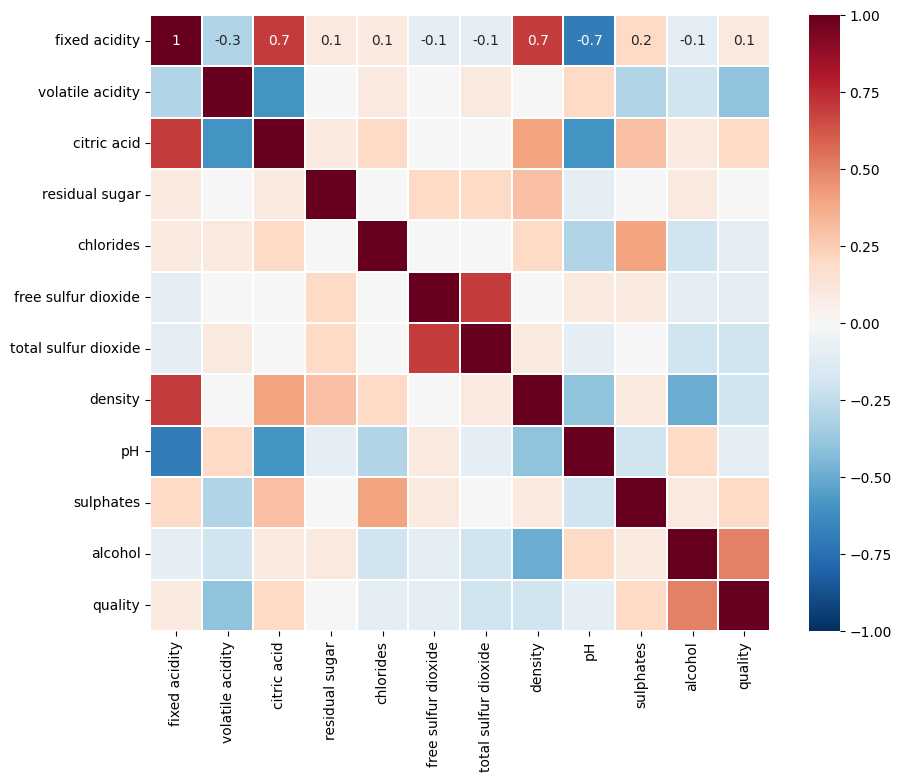

In [17]:
mapa_corr(wines)

Observaciones: Entre las variables 'fixed acidity' y 'citric acid', 'fixed acidity' y 'density', y 'total sulfur dioxide' y 'free sulfur dioxide' se observó una correlación de 0.7.
Por otro lado, como es de esperar, 'fixed acidity' y 'ph' tienen una correlación negativa de -0,7.

En cuanto a la correlación de las características y el objetivo, la mayor correlación está dada por 'alcohol' y'quality', que toma un valor ligeramente inferior a 0.7. 

Ya se verificó que no hay datos faltantes. Además se eliminaron los registros duplicados.
A continuación se reduce la dimensionalidad de las características considerando como umbral de índice de correlación mayor o igual a 0.7.

In [18]:
def reduccion(df, columnas):
  """
  Elimina las columnas, dentro del rango
  indicado, del dataframe de entrada.

  :param:
  :df: DataFrame con los atributos.
  :columnas: Columnas a eliminar.
  """
  df = df.drop(columnas, axis=1)
  return df

In [19]:
wines = reduccion(wines, ['citric acid', 'density', 'free sulfur dioxide', 'pH'])

Se estudian los outliers con un umbral de 3 sigmas.

In [20]:
def outliers(df, multiplo):
  """
  Nos permite definir umbrales de outliers,
  y detectar estos últimos.

  :param:
  :df: DataFrame con los atributos.
  :multiplo: Cantidad de desvíos estándar para definir
            umbral de 'outliers'.
  """
  # Se recorre cada característica
  features = df.columns
  for feature in features[2:]:
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - multiplo * std
    upper_bound = mean + multiplo * std
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    # Crea una nueva figura para cada boxplot
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel(feature)
    plt.axvline(x=lower_bound, color='r', linestyle='--')
    plt.axvline(x=upper_bound, color='r', linestyle='--')
    plt.show()

    print(f"Número de outliers en {feature}: {outliers[feature].count()}.\nLo que representa un {round(100*(outliers[feature].count()/df.shape[0]),1)} % del total de registros.\n")
    print(f'Outliers en {feature} (considerando 3 desvíos estándar):')
    print(outliers[feature])
    print('\n')


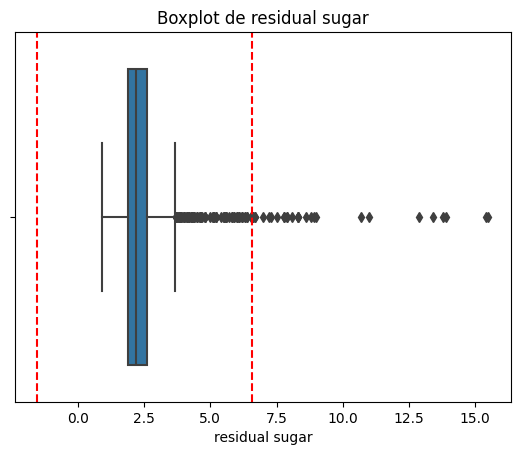

Número de outliers en residual sugar: 28.
Lo que representa un 2.1 % del total de registros.

Outliers en residual sugar (considerando 3 desvíos estándar):
33      10.7
163      7.3
164      7.2
274      7.0
324     11.0
396      7.9
413      6.7
415      6.6
480     15.5
494      8.3
595      7.9
649      8.6
652      7.5
889      6.6
911      9.0
917      8.8
1043     8.9
1071     8.1
1079     8.3
1081     8.3
1186     7.8
1235    12.9
1244    13.4
1434    15.4
1474    13.8
1558     6.7
1574    13.9
1589     7.8
Name: residual sugar, dtype: float64




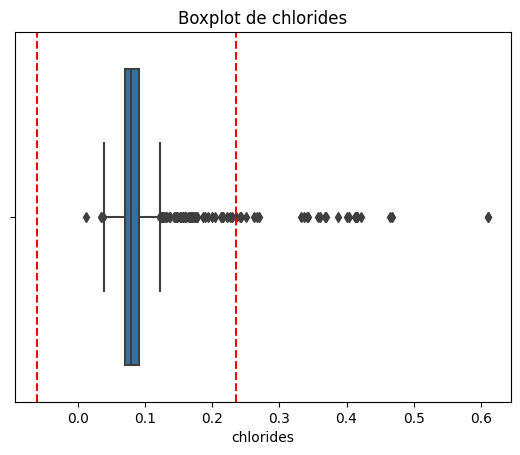

Número de outliers en chlorides: 27.
Lo que representa un 2.0 % del total de registros.

Outliers en chlorides (considerando 3 desvíos estándar):
17      0.368
19      0.341
42      0.332
81      0.464
83      0.401
106     0.467
151     0.610
169     0.360
181     0.270
226     0.337
240     0.263
258     0.611
281     0.358
291     0.343
451     0.413
568     0.250
692     0.422
730     0.387
754     0.415
776     0.243
777     0.241
1051    0.414
1165    0.369
1260    0.403
1319    0.414
1370    0.415
1374    0.267
Name: chlorides, dtype: float64




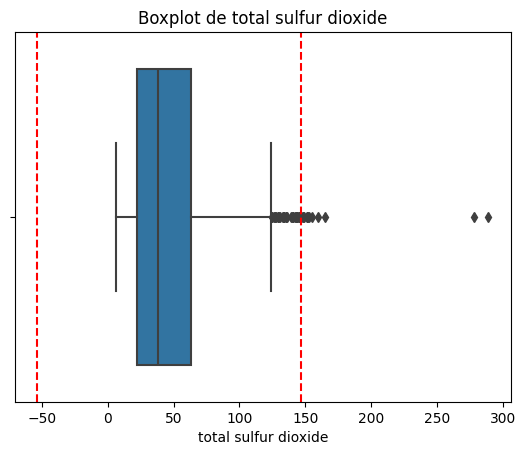

Número de outliers en total sulfur dioxide: 12.
Lo que representa un 0.9 % del total de registros.

Outliers en total sulfur dioxide (considerando 3 desvíos estándar):
15      148.0
109     153.0
354     165.0
515     151.0
591     149.0
649     148.0
651     155.0
672     151.0
684     152.0
1079    278.0
1081    289.0
1244    160.0
Name: total sulfur dioxide, dtype: float64




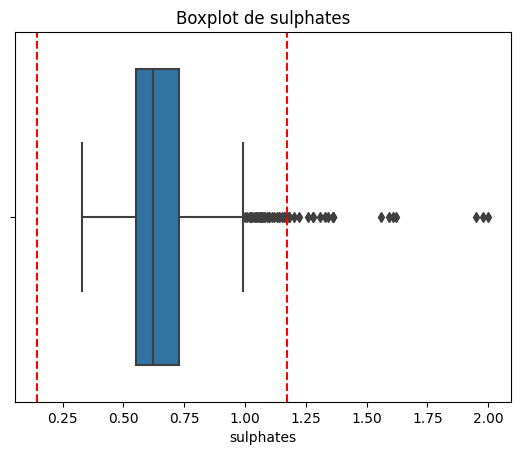

Número de outliers en sulphates: 21.
Lo que representa un 1.5 % del total de registros.

Outliers en sulphates (considerando 3 desvíos estándar):
13      1.56
17      1.28
43      1.20
81      1.28
86      1.95
88      1.22
92      1.98
106     1.31
151     2.00
169     1.59
226     1.61
258     1.26
339     1.36
340     1.18
614     1.36
639     1.36
723     1.62
795     1.18
1051    1.34
1319    1.33
1367    1.18
Name: sulphates, dtype: float64




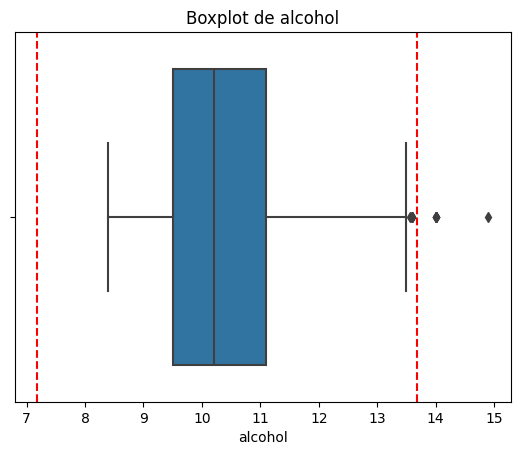

Número de outliers en alcohol: 7.
Lo que representa un 0.5 % del total de registros.

Outliers en alcohol (considerando 3 desvíos estándar):
142     14.0
467     14.0
588     14.0
652     14.9
821     14.0
1269    14.0
1270    14.0
Name: alcohol, dtype: float64




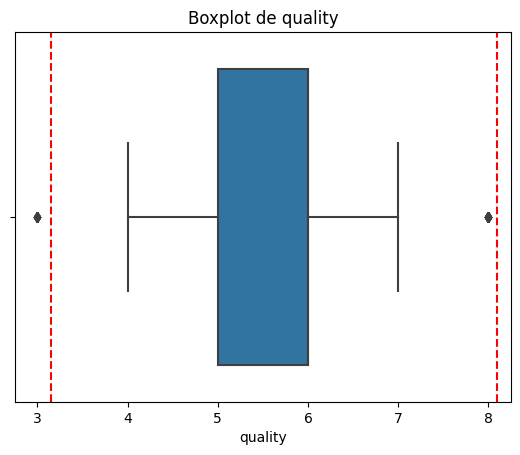

Número de outliers en quality: 10.
Lo que representa un 0.7 % del total de registros.

Outliers en quality (considerando 3 desvíos estándar):
459     3
517     3
690     3
832     3
899     3
1299    3
1374    3
1469    3
1478    3
1505    3
Name: quality, dtype: int64




In [21]:
outliers(wines, 3)

Considerando todas las caracteríasticas, los outliers se encuentran entre el 0 y el 2%, con lo cual se condidera que su impacto en los resultados no resulta significativo. Debido a la pequeña cantidad de registros clasificados como *outliers*, se decide usar la técnica de poda para eliminar aquellos registros donde haya al menos una característica con *outliers*.

In [22]:
def poda(df, multiplo):
    """
    Elimina mediante poda los registros donde al menos
    una de las características presente un outliers
    con el umbral definido.

    :param:
    :df: DataFrame con los atributos.
    :multiplo: Cantidad de desvíos estándar para definir
                umbral de 'outliers'.    
    """
    # Seleccionamos solo las columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calculamos el umbral de outliers para cada columna numérica
    thresholds = {}
    for column in numeric_columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        thresholds[column] = (mean - 3 * std_dev, mean + 3 * std_dev)

    # Filtramos el DataFrame para eliminar registros con outliers
    filtered_df = df.copy()
    for column, (lower, upper) in thresholds.items():
        filtered_df = filtered_df[(filtered_df[column] > lower) & (filtered_df[column] < upper)]

    return filtered_df

In [23]:
wines_filtered = poda(wines, 3)

In [24]:
wines_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1255 non-null   float64
 1   volatile acidity      1255 non-null   float64
 2   residual sugar        1255 non-null   float64
 3   chlorides             1255 non-null   float64
 4   total sulfur dioxide  1255 non-null   float64
 5   sulphates             1255 non-null   float64
 6   alcohol               1255 non-null   float64
 7   quality               1255 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 88.2 KB


El método de poda se aplicó para todos los registros donde al menos se encontrara una característica donde se ubicara un *outlier* según el umbral propuesto de 3 desvíos estándar. Con estos resultados, se observó que el dataframe disminuyó su cantidad de registros en un 8% (de 1359 a 1255), lo cual no parece significativo a priori.

En este caso se decidió estandarizar las características del dataframe dado que presentan rangos variables.

In [25]:
def escalado(df, ini_col, fin_col):
    """
    Escala las columnas, dentro del rango
    indicado, del dataframe de entrada.

    :param:
    :df: DataFrame con los atributos.
    :col_ini: Columna a partir de la cual eliminar.
    :col_fin: Columna hasta la cual eliminar.

    """
    # Normalizar columnas desde fin_col a fin_col
    cols_to_normalize = df.columns[ini_col:fin_col]

    df_normalized = df.copy()

    for col in cols_to_normalize:
        mean = df[col].mean()
        std = df[col].std()
        df_normalized[col] = (df[col] - mean) / std

    return df_normalized

In [26]:
wines_filtered_normalizaded = escalado(wines_filtered, 0, 7)

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


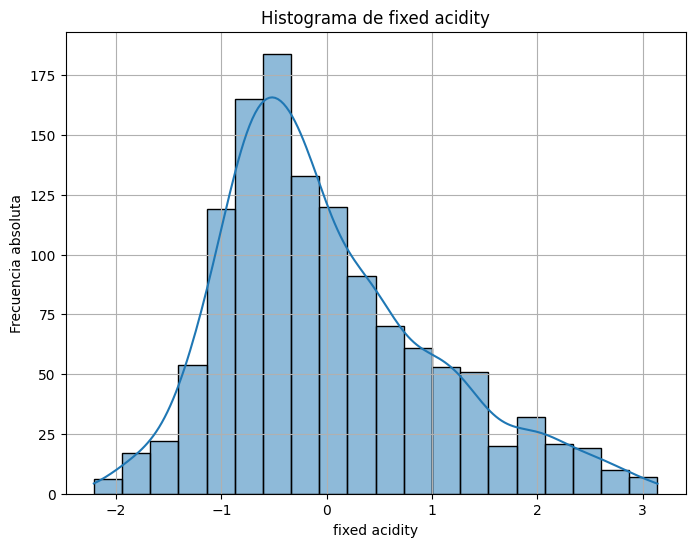

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


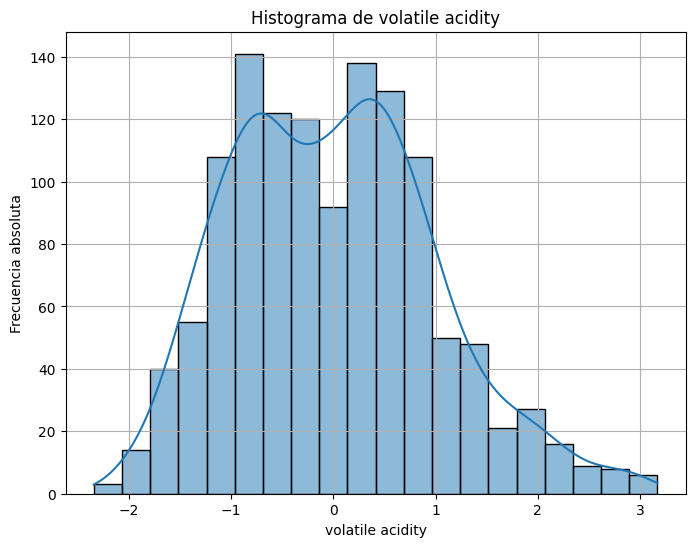

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


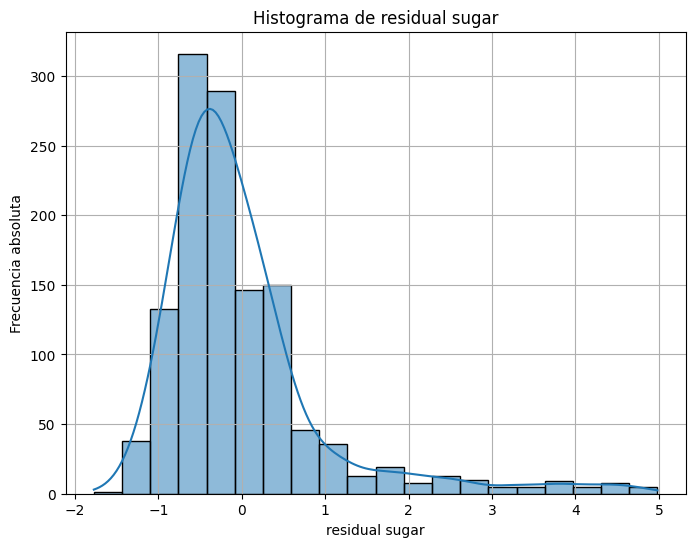

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


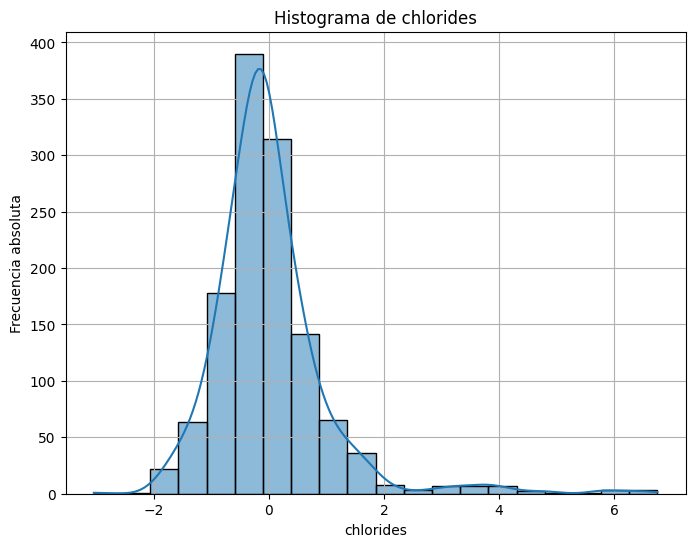

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


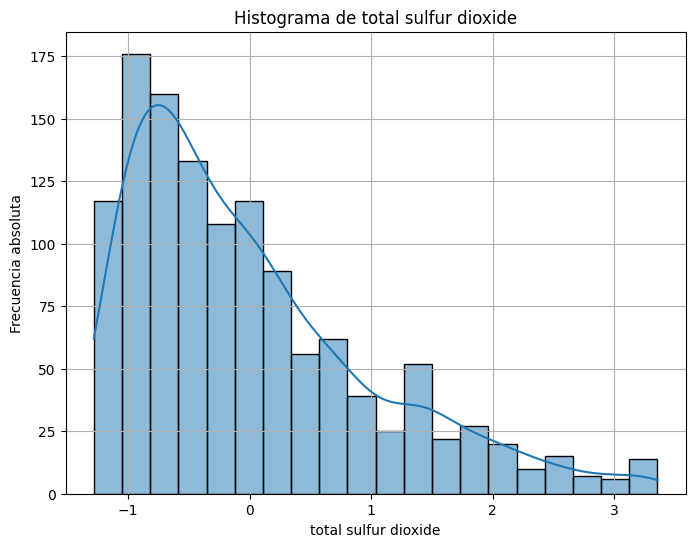

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


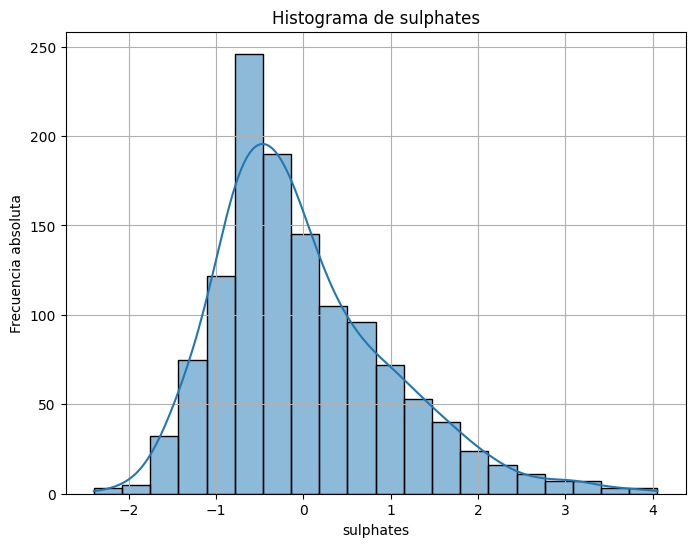

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


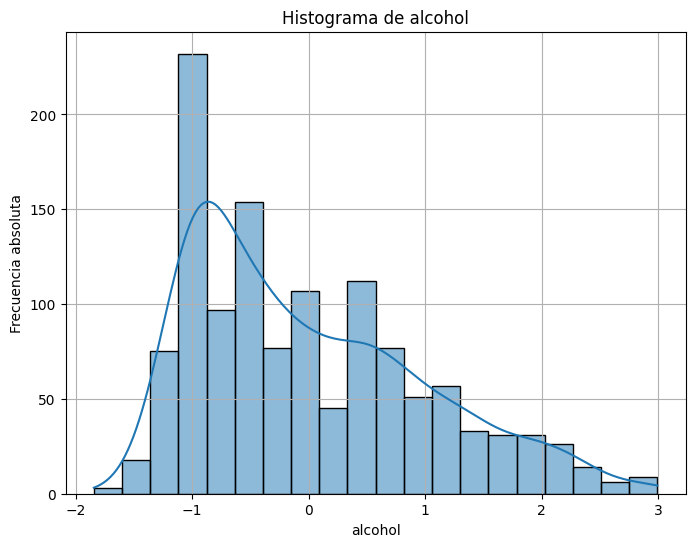

In [27]:
# Corroboracion de escalado normal
distribuciones_reales(wines_filtered_normalizaded)

In [28]:
# Guardado del dataframe procesado
def guardar(df, path):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    df.to_csv(path, index=False)
  
  except:
    print('No se han podido persistir los datos.')


In [29]:
ruta_datos = os.path.join(ruta, "dataset/winequality-red_procesados.csv")

guardar(wines_filtered_normalizaded, ruta_datos)

Bibliografia

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.